In [1]:
pip install opendatasets

In [2]:
import opendatasets as od

In [3]:
# data=od.download("https://www.kaggle.com/datasets/prasunroy/natural-images/",force=True)

In [4]:
import numpy as np
import pandas as pd
from pathlib import Path
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from time import perf_counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from IPython.display import Markdown, display
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from keras.preprocessing.image import load_img,img_to_array,ImageDataGenerator
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import plot_model 
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Activation,Concatenate
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler, ReduceLROnPlateau
from tensorflow.keras import backend, models
from sklearn.metrics import confusion_matrix

from keras.preprocessing.image import load_img,img_to_array,ImageDataGenerator

In [5]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [6]:
dir= Path('/content/drive/MyDrive/dm project/natural_images/')
filepaths = list(dir.glob(r'**/*.jpg'))

In [7]:
labels=os.listdir('/content/drive/MyDrive/dm project/natural_images/')
print(labels)

['airplane', 'person', 'flower', 'car', 'dog', 'motorbike', 'cat', 'fruit']



 AIRPLANE


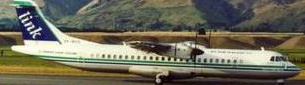

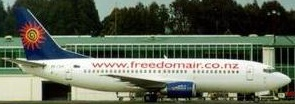

there are  727  images in  airplane class

 PERSON


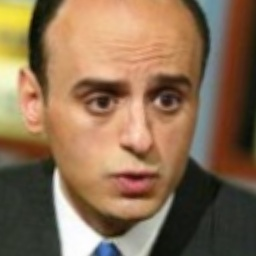

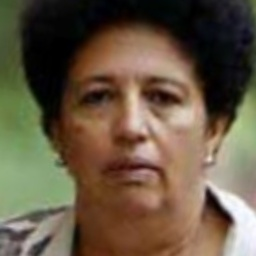

there are  986  images in  person class

 FLOWER


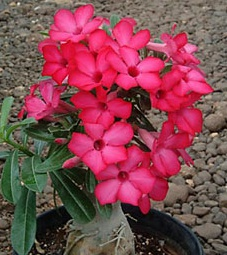

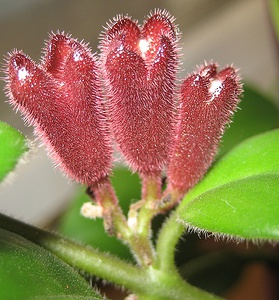

there are  843  images in  flower class

 CAR


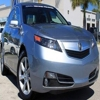

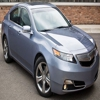

there are  968  images in  car class

 DOG


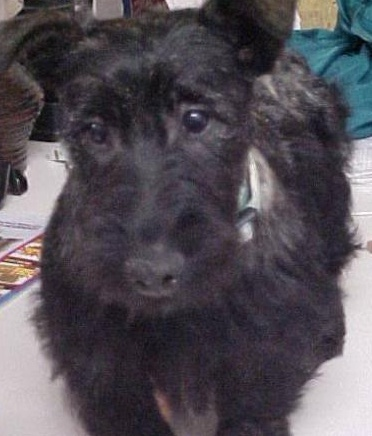

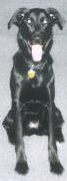

there are  702  images in  dog class

 MOTORBIKE


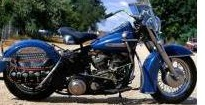

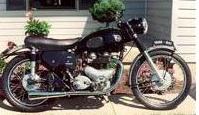

there are  788  images in  motorbike class

 CAT


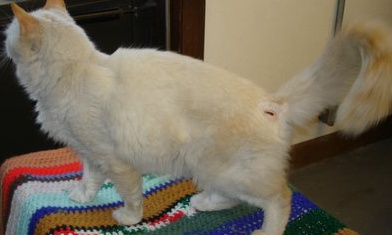

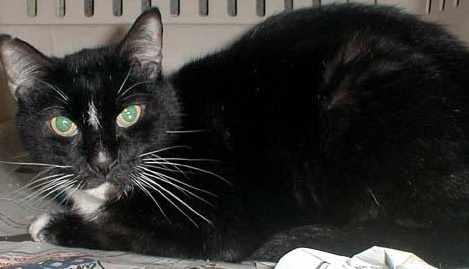

there are  885  images in  cat class

 FRUIT


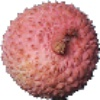

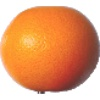

there are  1000  images in  fruit class


In [8]:
from IPython.display import Image, display
num = []
for label in labels:
    path = '/content/drive/MyDrive/dm project/natural_images/{0}/'.format(label)
    folder_data = os.listdir(path)
    k = 0
    print('\n', label.upper())
    for image_path in folder_data:
        if k < 2:
            display(Image(path+image_path))
        k = k+1
    num.append(k)
    print('there are ', k,' images in ', label, 'class')



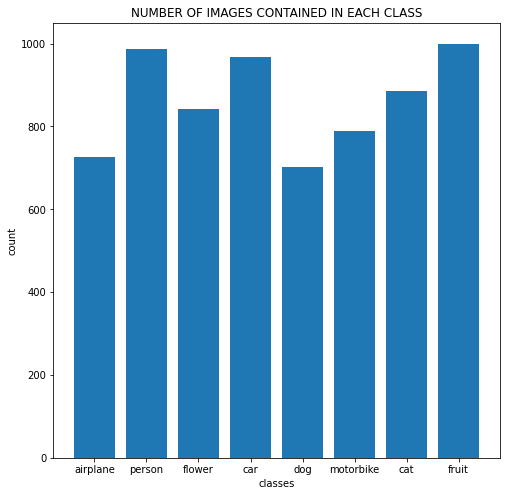

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8,8))
plt.bar(labels, num)
plt.title('NUMBER OF IMAGES CONTAINED IN EACH CLASS')
plt.xlabel('classes')
plt.ylabel('count')
plt.show()

In [10]:
x_data =[]
y_data = []
import cv2
for label in labels:
    path = '/content/drive/MyDrive/dm project/natural_images/{0}/'.format(label)
    folder_data = os.listdir(path)
    for image_path in folder_data:
        image = cv2.imread(path+image_path)
        image_resized = cv2.resize(image, (32,32))
        x_data.append(np.array(image_resized))
        y_data.append(label)

In [11]:
x_data = np.array(x_data)
y_data = np.array(y_data)

In [12]:
x_data.shape


(6899, 32, 32, 3)

In [13]:
y_data.shape

(6899,)

In [14]:
y_encoded = LabelEncoder().fit_transform(y_data)
y_categorical = to_categorical(y_encoded)

In [15]:
r = np.arange(x_data.shape[0])
np.random.seed(42)
np.random.shuffle(r)
X = x_data[r]
Y = y_categorical[r]

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [32]:
model = Sequential()

model.add(Conv2D(128, (3, 3), padding='same',input_shape=X_train.shape[1:])) 
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3))) 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(BatchNormalization())
model.add(Dropout(0.35))

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization()) 

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(BatchNormalization())
model.add(Dropout(0.35)) #64 --> 42

model.add(Conv2D(512, (3, 3), padding='same')) 
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Flatten()) 
model.add(Dropout(0.5)) 
model.add(Dense(512)) 
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dense(8)) 
model.add(Activation('softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 128)       3584      
                                                                 
 activation_7 (Activation)   (None, 32, 32, 128)       0         
                                                                 
 batch_normalization_6 (Batc  (None, 32, 32, 128)      512       
 hNormalization)                                                 
                                                                 
 conv2d_6 (Conv2D)           (None, 30, 30, 128)       147584    
                                                                 
 activation_8 (Activation)   (None, 30, 30, 128)       0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 128)      0         
 2D)                                                  

In [33]:
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy'])

In [38]:
history = model.fit(X_train, Y_train, epochs=10, validation_split=0.2)

Epoch 1/10
138/138 [==============================] - 2s 14ms/step - loss: 0.0807 - accuracy: 0.9740 - val_loss: 0.3305 - val_accuracy: 0.9013
Epoch 2/10
138/138 [==============================] - 2s 13ms/step - loss: 0.0437 - accuracy: 0.9846 - val_loss: 0.3462 - val_accuracy: 0.9185
Epoch 3/10
138/138 [==============================] - 2s 13ms/step - loss: 0.0216 - accuracy: 0.9923 - val_loss: 0.3286 - val_accuracy: 0.9004
Epoch 4/10
138/138 [==============================] - 2s 13ms/step - loss: 0.0245 - accuracy: 0.9928 - val_loss: 0.4026 - val_accuracy: 0.8877
Epoch 5/10
138/138 [==============================] - 2s 13ms/step - loss: 0.0231 - accuracy: 0.9925 - val_loss: 0.2858 - val_accuracy: 0.9257
Epoch 6/10
138/138 [==============================] - 2s 13ms/step - loss: 0.0190 - accuracy: 0.9937 - val_loss: 0.3019 - val_accuracy: 0.9185
Epoch 7/10
138/138 [==============================] - 2s 13ms/step - loss: 0.0155 - accuracy: 0.9955 - val_loss: 0.3014 - val_accuracy: 0.9158

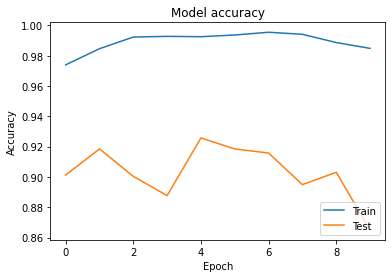

In [39]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()


In [40]:
history = model.fit(X_test, Y_test, epochs=10, validation_split=0.2)

Epoch 1/10
35/35 [==============================] - 1s 15ms/step - loss: 0.1578 - accuracy: 0.9601 - val_loss: 0.6701 - val_accuracy: 0.8587
Epoch 2/10
35/35 [==============================] - 0s 13ms/step - loss: 0.0688 - accuracy: 0.9755 - val_loss: 0.4833 - val_accuracy: 0.8804
Epoch 3/10
35/35 [==============================] - 0s 13ms/step - loss: 0.0492 - accuracy: 0.9792 - val_loss: 0.6021 - val_accuracy: 0.8696
Epoch 4/10
35/35 [==============================] - 0s 14ms/step - loss: 0.0252 - accuracy: 0.9918 - val_loss: 0.3358 - val_accuracy: 0.8949
Epoch 5/10
35/35 [==============================] - 0s 13ms/step - loss: 0.0148 - accuracy: 0.9955 - val_loss: 0.3551 - val_accuracy: 0.9094
Epoch 6/10
35/35 [==============================] - 0s 13ms/step - loss: 0.0143 - accuracy: 0.9937 - val_loss: 0.4828 - val_accuracy: 0.8877
Epoch 7/10
35/35 [==============================] - 0s 13ms/step - loss: 0.0203 - accuracy: 0.9937 - val_loss: 0.3696 - val_accuracy: 0.8877
Epoch 8/10
35

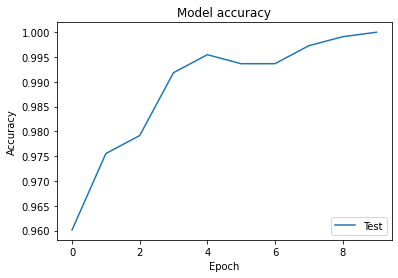

In [41]:
plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend([ 'Test'], loc='lower right')
plt.show()

# reference:https://www.kaggle.com/code/yasinsoylu123/natural-image-classification
# https://github.com/nachi-hebbar/Gradip-FlowerClassification-WebApp/blob/main/Gradio_WebApp_FlowerClassification.ipynb
# https://www.analyticsvidhya.com/blog/2021/06/image-processing-using-cnn-a-beginners-guide/


In [28]:
# pip install gradio

In [29]:
# import gradio as gr

In [30]:
# def img_predict(img):
#   img_4d=img.reshape(-1,32,32,3)
#   prediction=model.predict(img_4d)[0]
#   return {labels[i]: float(prediction[i]) for i in range(8)}

In [31]:
# image = gr.inputs.Image(shape=(32,32))
# label = gr.outputs.Label(num_top_classes=8)

# gr.Interface(fn=img_predict, inputs=image, outputs=label,interpretation='default').launch(debug='True')